In [1]:
import random
import pandas as pd
import numpy as np 
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

2023-12-01 18:59:17.194217: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 18:59:17.226255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 18:59:17.226866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 18:59:17.950877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

# CLUSTERING

In [2]:
data_housing = pd.read_csv('housing.csv')

## 1:Demonstrate  application of k‐MEANS CLUSTERING Using Python

In [21]:
# X ,Y = fetch_california_housing(return_X_y = True, as_frame = True) 

In [22]:
scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

# features = ['total_rooms','housing_median_age', 'households', 'population','median_income']	
# X = data_housing[features]
# Y = data_housing['median_house_value']
scaler = MinMaxScaler()

# Y = Y.values.reshape(-1, 1)
# Y = scaler.fit_transform(Y)
X = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)


In [23]:
data_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [24]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [20]:

y_predicted = knc.predict(x_test)
# cm = confusion_matrix(y_test, y_predicted)
# sns.heatmap(cm, annot=True, cmap='Greens')
# print('Accuracy:',knc.score(y_test, y_predicted))

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predicted)} \nMean Squared Error: {mean_squared_error(y_test, y_predicted)}')

Mean Absolute Error: 75685.00465116279 
Mean Squared Error: 11275809202.56279


In [46]:
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


In [47]:
# data_housing.describe().transpose()

In [48]:
features = ['longitude', 'latitude', 'median_income']
select_df = data_housing[features]
select_df.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

In [49]:
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

In [50]:
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(X)
model

/home/darth-kartikey/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [61]:
y_predicted = kmeans.predict(X)

cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='Greens')

ValueError: Found input variables with inconsistent numbers of samples: [5160, 20640]

In [51]:
centers = model.cluster_centers_
centers[:5]

array([[-1.19024473,  0.97381708,  0.85176073],
       [ 0.77155559, -0.82761899,  0.73715002],
       [-0.08049943,  0.23093313, -0.65829299],
       [ 0.87429723, -0.8501122 , -0.5766827 ],
       [-1.16155392,  1.27281274, -0.55564488]])

In [52]:
centers.shape

(6, 3)

In [53]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [54]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [55]:
P = pd_centers(features, centers)

In [56]:
P

,longitude,latitude,median_income,prediction
0,-1.190245,0.973817,0.851761,0
1,0.771556,-0.827619,0.737150,1
2,-0.080499,0.230933,-0.658293,2
3,0.874297,-0.850112,-0.576683,3
4,-1.161554,1.272813,-0.555645,4
5,0.200847,-0.371385,3.434079,5


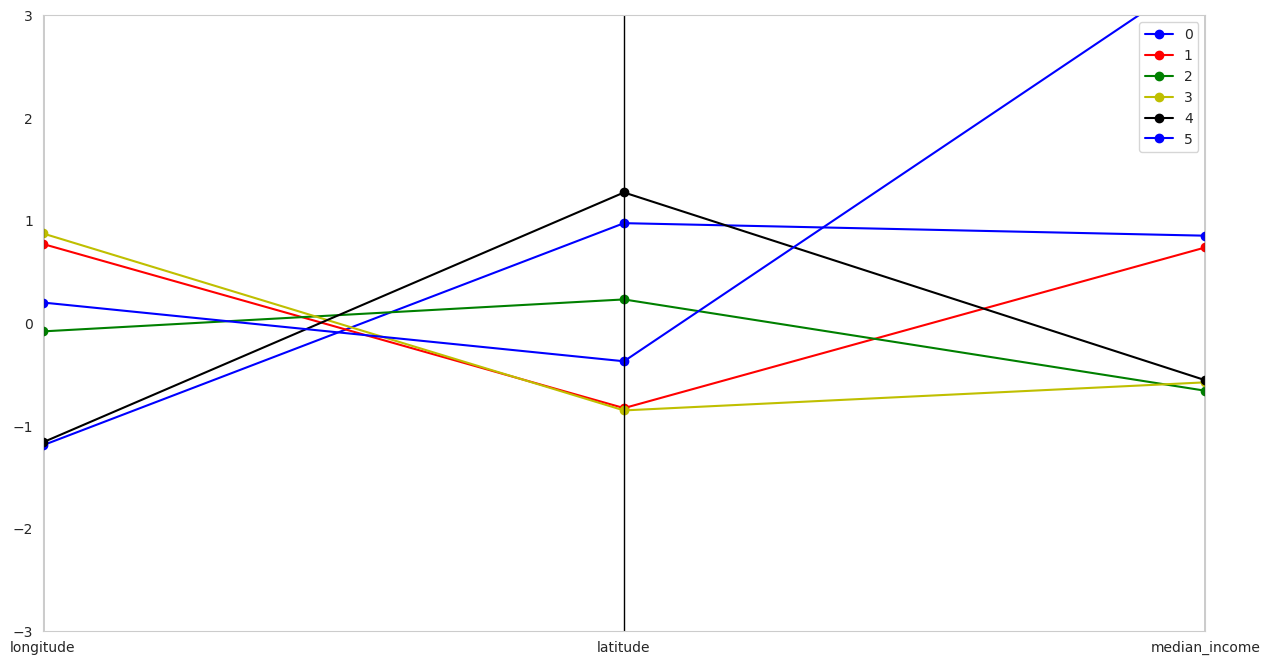

In [57]:
parallel_plot(P)

In [58]:
data_housing['econ_region'] = kmeans.fit_predict(X)
data_housing['econ_region'] = data_housing['econ_region'].astype("category")
data_housing.head()

/home/darth-kartikey/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


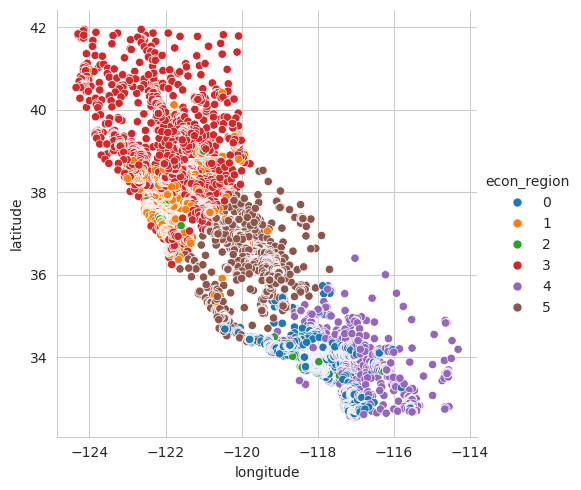

In [59]:
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data_housing, kind='scatter');

In [60]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = data_housing[median_attributes]
income_house.groupby(['econ_region']).describe()

median_house_value                                          \
                         count           mean            std       min   
econ_region                                                              
0                       4249.0  270471.350200  102188.005227   14999.0   
1                       2801.0  285601.780079  103452.896128   67500.0   
2                        579.0  463750.944732   70320.077287  112500.0   
3                       4839.0  156319.412689   86790.819844   14999.0   
4                       6515.0  172173.978358   81408.694148   14999.0   
5                       1657.0  104795.295112   68646.783498   26600.0   

                                                    median_income             \
                  25%       50%       75%       max         count       mean   
econ_region                                                                    
0            192600.0  244800.0  332000.0  500001.0        4249.0   5.277636   
1            206700.0  269800.0  351500.0  500001.0        2801.0   5.489327   
2            452950.0  500001.0  500001.0  500001.0         579.0  10.398594   
3             94200.0  134100.0  192550.0  500001.0        4839.0   2.815333   
4            117100.0  158200.0  201350.0  500001.0        6515.0   2.778933   
5             61500.0   81600.0  117700.0  500001.0        1657.0   2.620062   

             ...                   housing_median_age                        \
             ...      75%      max              count       mean        std   
econ_region  ...                                                              
0            ...   5.9202   8.2531             4249.0  26.517769  12.264206   
1            ...   6.1008   9.5551             2801.0  27.163513  13.231255   
2            ...  11.1873  15.0001              579.0  27.507772  13.940724   
3            ...   3.4796   4.5590             4839.0  30.644348  13.435782   
4            ...   3.4089   4.1293             6515.0  30.044820  11.591256   
5            ...   3.2083   5.0100             1657.0  25.590223  11.137718   

                                          
             min   25%   50%   75%   max  
econ_region                               
0            1.0  16.0  27.0  35.0  52.0  
1            1.0  17.0  26.0  36.0  52.0  
2            2.0  17.0  26.0  37.0  52.0  
3            2.0  19.0  30.0  42.0  52.0  
4            1.0  21.0  31.0  38.0  52.0  
5            2.0  17.0  25.0  34.0  52.0  

[6 rows x 24 columns]